In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare/submission.csv
/kaggle/input/taxi-fare/train.csv
/kaggle/input/taxi-fare/test.csv


# Introductory Summary

1. Rank : 38th / 451 (Competition participated)

2. Preprocessing :

3. Feature Engineering : 

4. Model

In [2]:
test=pd.read_csv('/kaggle/input/taxi-fare/test.csv')
train=pd.read_csv('/kaggle/input/taxi-fare/train.csv')
train

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,22.43,1,N,1,59.5,0.5,0.5,10.00,5.76,0.3,76.56,132,259,2018,5,23,2,23,2998.0,29.76
34996,9.16,1,N,1,30.0,0.0,0.5,6.58,5.76,0.3,43.14,24,138,2018,4,4,2,9,1419.0,29.15
34997,6.78,1,N,1,23.0,0.0,0.5,5.95,0.00,0.3,29.75,140,231,2018,3,7,2,8,2459.0,42.67
34998,0.26,1,N,2,3.0,0.0,0.5,0.00,0.00,0.3,3.80,142,142,2018,4,18,2,8,1932.0,26.73


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='calculated_total_amount', ylabel='Density'>

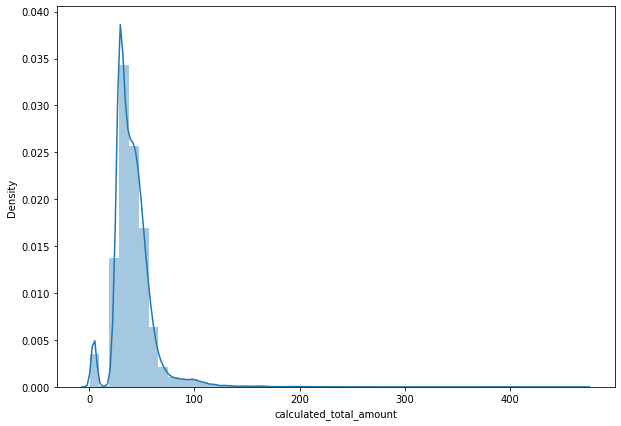

In [3]:
#아웃라이어 확인
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sns.distplot(train['calculated_total_amount'])



In [4]:
drop_index = train[train['calculated_total_amount'] > 250].index
train = train.drop(drop_index)


In [5]:
alldata=pd.concat([train,test])
alldata

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,5.80,1,N,1,22.0,0.5,0.5,3.50,0.00,0.3,28.75,148,143,2018,5,5,5,0,1121.0,NaN
14996,10.50,1,N,1,35.5,0.5,0.5,7.35,0.00,0.3,44.15,163,85,2018,7,5,3,23,1744.0,NaN
14997,9.10,1,N,1,27.0,0.5,0.5,6.80,5.76,0.3,40.86,138,107,2018,9,13,3,20,1362.0,NaN
14998,9.50,1,N,1,29.5,0.0,0.5,7.00,5.76,0.3,43.06,170,138,2018,8,22,2,12,101.0,NaN


In [6]:
### feature column 추가
alldata['pick_drop'] = alldata['pickup_location_id'].astype(str) + '_' +  alldata['dropoff_location_id'].astype(str)



In [7]:
alldata.nunique()

trip_distance              2493
rate_code                     5
store_and_fwd_flag            2
payment_type                  4
fare_amount                 420
extra                         9
mta_tax                       2
tip_amount                 1580
tolls_amount                215
imp_surcharge                 2
total_amount               3198
pickup_location_id          224
dropoff_location_id         255
year                          1
month                        12
day                          31
day_of_week                   7
hour_of_day                  24
trip_duration              4251
calculated_total_amount    2665
pick_drop                  7799
dtype: int64

In [8]:
alldata2=alldata.drop(columns=['year','calculated_total_amount'])

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
alldata2['store_and_fwd_flag'] = le.fit_transform(alldata2['store_and_fwd_flag'])
alldata2['pick_drop'] = le.fit_transform(alldata2['pick_drop'])
alldata2

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,month,day,day_of_week,hour_of_day,trip_duration,pick_drop
0,9.01,1,0,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,3,7,2,6,2131.0,5674
1,0.20,1,0,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2,25,6,10,2377.0,5802
2,9.65,1,0,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,1,29,0,8,1286.0,1168
3,9.50,1,0,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,9,25,1,20,2586.0,3278
4,5.80,1,0,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,8,20,0,21,1575.0,2626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,5.80,1,0,1,22.0,0.5,0.5,3.50,0.00,0.3,28.75,148,143,5,5,5,0,1121.0,2005
14996,10.50,1,0,1,35.5,0.5,0.5,7.35,0.00,0.3,44.15,163,85,7,5,3,23,1744.0,2759
14997,9.10,1,0,1,27.0,0.5,0.5,6.80,5.76,0.3,40.86,138,107,9,13,3,20,1362.0,1053
14998,9.50,1,0,1,29.5,0.0,0.5,7.00,5.76,0.3,43.06,170,138,8,22,2,12,101.0,3025


In [10]:
train2 = alldata2[:len(train)]
test2 = alldata2[len(train):]


In [11]:

train['calculated_total_amount'].describe()


count    34987.000000
mean        41.217702
std         18.318937
min          0.310000
25%         30.300000
50%         38.460000
75%         48.200000
max        249.300000
Name: calculated_total_amount, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train2,train['calculated_total_amount'], test_size = 0.2, random_state = 100)

In [13]:
from catboost import CatBoostRegressor
cbr = CatBoostRegressor(verbose = 100)
cbr.fit(x_train,y_train,eval_set = (x_valid,y_valid), early_stopping_rounds= 50)
result = cbr.predict(test2)


Learning rate set to 0.085916
0:	learn: 18.2425680	test: 18.5908341	best: 18.5908341 (0)	total: 60.5ms	remaining: 1m
Stopped by overfitting detector  (50 iterations wait)

bestTest = 18.57263648
bestIteration = 22

Shrink model to first 23 iterations.


In [14]:
sub = pd.read_csv('/kaggle/input/taxi-fare/submission.csv')
sub['calculated_total_amount'] = result
sub

,calculated_total_amount
0,39.202314
1,41.578767
2,41.441545
3,39.949764
4,40.216242
...,...
14995,41.636677
14996,41.495920
14997,41.656772
14998,40.699238


In [15]:
sub.to_csv('sub_taxi2.csv', index = 0)